In [50]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [24]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [29]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
len(june_temps_list)

1700

In [22]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['tobs'])
june_df.head()

,tobs
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [23]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [25]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = []
december_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [28]:
# 7. Convert the December temperatures to a list.
december_temps_list = [temp.tobs for temp in december_temps]
len(december_temps_list)

1517

In [31]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temps, columns=['tobs'])
december_df.head()

,tobs
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [32]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [66]:
# Create a dataframe with the temperatures for both 
frames = [june_df, december_df]
june_december_df = pd.concat(frames, axis=1)
june_december_df.columns = ['June', 'December']
june_december_df.head()

,June,December
0,78.0,76.0
1,76.0,74.0
2,78.0,74.0
3,76.0,64.0
4,77.0,64.0


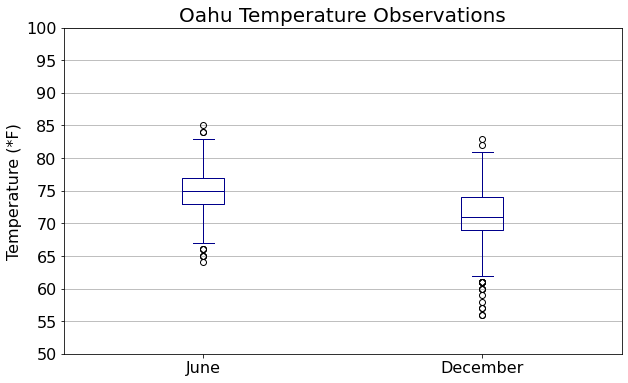

In [144]:
# Visualize the temperature observations on a box plot
june_december_df.plot(kind = "box", 
                      figsize = (10,6), 
                      color = 'darkblue',
                      ylabel = 'Temperature (*F)',
                      yticks = (np.arange(50, 101, step=5)),
                      fontsize = 16)
plt.title("Oahu Temperature Observations", fontsize=20)
plt.ylabel("Temperature (*F)", fontsize=16)
plt.gca().yaxis.grid(True)

plt.savefig("Oahu_tobs.png")

plt.show()